In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import io
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import cv2
from matplotlib.backends.backend_agg import FigureCanvasAgg
import numpy as np

def show_img(img, dpi=150, title=None):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=dpi)
    ax.set_title( title, fontsize=16, color='black')
    ax.axis('off')
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return fig, ax

# def figure2ndarray(fig:matplotlib.figure.Figure):
#     s, (width, height) = FigureCanvasAgg(fig).print_to_buffer()
#     buffer = np.frombuffer(s, dtype="uint8")
#     img_rgba = buffer.reshape(height, width, 4)
#     rgb, alpha = np.split(img_rgba, [3], axis=2)
#     img = rgb.astype("uint8")
#     return img

# 改良版
def figure2ndarray(fig: matplotlib.figure.Figure):
    canvas = FigureCanvasAgg(fig)
    canvas.draw()
    
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight')
    buf.seek(0)
    
    img = Image.open(buf)
    img_array = np.array(img)
    
    # RGBAからRGBに変換
    if img_array.shape[2] == 4:
        img_array = img_array[:, :, :3]
    return img_array


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(<Figure size 960x720 with 1 Axes>, <Axes: >)

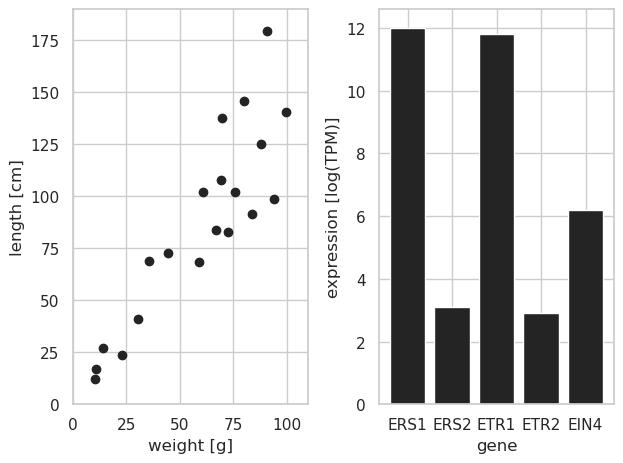

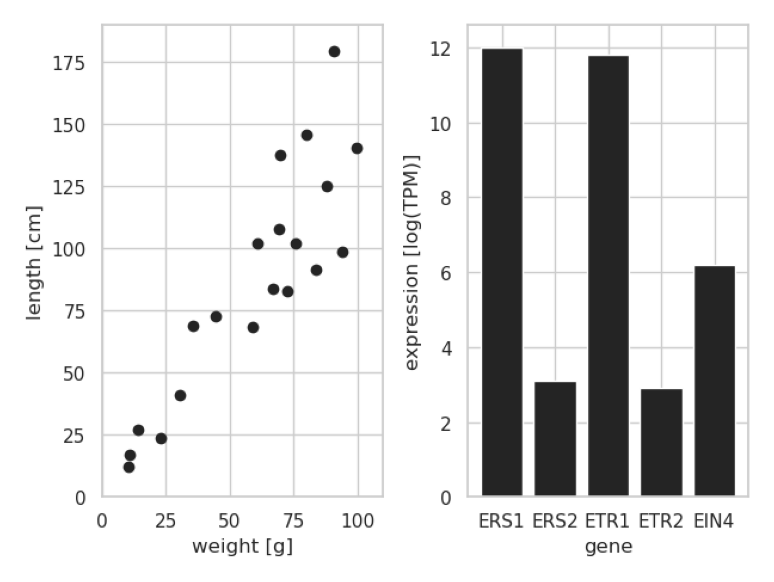

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
sns.set_style('whitegrid')
sns.set_palette('gray')

np.random.seed(2018)

fig = plt.figure()

# top
x1 = np.random.uniform(0, 100, 20)
y1 = x1 * np.random.uniform(1, 2, 20)

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(x1, y1)
ax1.set_xlabel("weight [g]")
ax1.set_ylabel("length [cm]")
ax1.set_xlim(0, 110)
ax1.set_ylim(0, 190)

# bottom
x2 = np.array(['ERS1', 'ERS2', 'ETR1', 'ETR2', 'EIN4'])
y2 = np.array([12.0, 3.1, 11.8, 2.9, 6.2])
x2_position = np.arange(len(x2))

ax2 = fig.add_subplot(1, 2, 2)
ax2.bar(x2_position, y2, tick_label=x2)
ax2.set_xlabel("gene")
ax2.set_ylabel("expression [log(TPM)]")

# show plots
fig.tight_layout()
fig.show()

fig_img = figure2ndarray(fig)
show_img(fig_img)